In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
#from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from imblearn.metrics import geometric_mean_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/shahriariit/opendataset/master/Parkinson%20(1).csv')

In [4]:
df.head()

,Recording,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,Shim_APQ5,Shi_APQ11,HNR05,HNR15,HNR25,HNR35,HNR38,RPDE,DFA,PPE,GNE,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,Delta0,Delta1,Delta2,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12,Status
0,1,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.26313,0.017463,0.019660,0.021882,59.437966,60.736249,71.882864,77.626729,77.538042,0.250433,0.599346,0.005397,0.900404,1.319502,1.336201,1.302408,1.329085,1.284922,1.209225,1.239354,1.277002,1.332503,1.347470,1.367540,1.402141,1.393809,1.397874,1.372464,1.390298,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610,0
1,2,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.20217,0.013010,0.014097,0.016828,59.838895,62.655599,74.378669,79.989228,80.269783,0.271445,0.581242,0.075617,0.887042,1.215251,1.221557,1.265419,1.187177,1.256340,1.246375,1.283629,1.302498,1.308008,1.316527,1.370643,1.373966,1.344655,1.302399,1.347680,1.365750,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508,0
2,3,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.16710,0.011049,0.012683,0.013038,57.293808,61.858336,73.665297,78.930502,79.033510,0.203531,0.600759,0.005283,0.889399,1.426075,1.220701,1.344188,1.346296,1.339797,1.334447,1.391798,1.349621,1.349904,1.340463,1.362594,1.313769,1.277938,1.312889,1.352442,1.243385,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402,0
3,1,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.20892,0.014525,0.015696,0.018330,62.179573,68.678205,79.839984,84.367682,84.252430,0.261360,0.625216,0.030518,0.875984,1.495235,1.602983,1.572715,1.498323,1.561722,1.590510,1.626319,1.645811,1.666730,1.618487,1.493691,1.459040,1.383606,1.379629,1.217517,1.309647,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456,0
4,2,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.11607,0.006461,0.008385,0.011037,67.534024,74.976858,85.727420,91.033967,91.145189,0.222069,0.602493,0.035602,0.902206,1.516959,1.581687,1.542668,1.613747,1.501956,1.258557,1.385013,1.452518,1.498049,1.421549,1.557644,1.187218,1.576015,1.252247,1.577338,1.583072,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023,0


In [5]:
df.describe()

,Recording,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,Shim_APQ5,Shi_APQ11,HNR05,HNR15,HNR25,HNR35,HNR38,RPDE,DFA,PPE,GNE,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,Delta0,Delta1,Delta2,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12,Status
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,2.000000,0.400000,0.583987,0.000044,0.003172,0.003532,0.038428,0.336832,0.021499,0.023468,0.028671,59.328203,63.674583,74.198478,80.187240,81.505404,0.310517,0.612911,0.271958,0.917801,1.345764,1.302292,1.289089,1.349270,1.354317,1.338350,1.334774,1.339938,1.354771,1.346205,1.346094,1.355388,1.338195,1.338939,1.335040,1.342467,1.343238,1.348914,1.337717,1.341786,1.340895,1.343978,1.341472,1.331433,1.346381,1.346144,0.500000
std,0.818203,0.490922,0.535769,0.000045,0.003373,0.004449,0.023213,0.205905,0.013787,0.014402,0.016610,14.541946,15.621195,16.442566,17.187765,17.395830,0.065639,0.077780,0.229851,0.033911,0.209207,0.235640,0.259544,0.215538,0.212376,0.216225,0.207402,0.216467,0.214952,0.203527,0.210776,0.215601,0.204511,0.222206,0.223335,0.227232,0.198174,0.212008,0.204978,0.209407,0.213689,0.211364,0.204085,0.211297,0.221484,0.208819,0.501045
min,1.000000,0.000000,0.148010,0.000007,0.000678,0.001036,0.007444,0.064989,0.003344,0.004103,0.006459,22.224723,26.274029,33.156101,36.494025,36.908213,0.162762,0.411359,0.004127,0.847307,0.770151,0.725522,0.569471,0.727609,0.771259,0.611540,0.829087,0.653565,0.839535,0.823632,0.813607,0.823157,0.844357,0.620845,0.647406,0.628107,0.766458,0.840133,0.741690,0.759689,0.764649,0.762798,0.811942,0.777012,0.643132,0.748411,0.000000
25%,1.000000,0.000000,0.298260,0.000019,0.001551,0.001867,0.024336,0.211785,0.012909,0.014986,0.019180,50.558623,54.237537,63.879230,69.823899,70.435013,0.263217,0.556756,0.040811,0.891408,1.208843,1.149207,1.122922,1.212101,1.218042,1.199275,1.204434,1.188848,1.220585,1.221013,1.229496,1.204163,1.197492,1.198202,1.182790,1.196205,1.208624,1.221101,1.197868,1.194186,1.194138,1.191881,1.189515,1.192397,1.202525,1.206559,0.000000
50%,2.000000,0.000000,0.481455,0.000035,0.002337,0.002870,0.032960,0.287885,0.018571,0.019897,0.024909,59.742330,64.844019,75.457858,80.992704,82.354119,0.305054,0.606502,0.246486,0.912809,1.340906,1.294779,1.298645,1.338791,1.342907,1.331794,1.323245,1.321939,1.340258,1.334706,1.338213,1.356528,1.338452,1.333607,1.341507,1.323866,1.351015,1.342237,1.337233,1.338437,1.344416,1.335517,1.349243,1.333345,1.347297,1.331212,0.500000
75%,3.000000,1.000000,0.681685,0.000056,0.003678,0.003991,0.045475,0.399860,0.025784,0.027900,0.033757,68.686365,73.439434,85.652177,92.330509,93.500429,0.349273,0.661144,0.405402,0.946479,1.491018,1.474178,1.479907,1.496511,1.497181,1.473760,1.452817,1.486387,1.482438,1.486456,1.466926,1.515044,1.474081,1.482893,1.485977,1.491861,1.488878,1.470287,1.485597,1.496845,1.490389,1.495355,1.475330,1.472589,1.506674,1.475235,1.000000
max,3.000000,1.000000,6.838200,0.000550,0.043843,0.065199,0.192600,1.747600,0.113240,0.120760,0.142440,101.206326,109.651117,120.712830,128.289325,129.985236,0.535953,0.784376,0.908395,0.987292,1.949103,1.835651,1.928430,1.857084,1.840846,1.976153,2.000783,2.016728,1.918429,2.039576,2.071291,1.983561,2.029982,2.028056,2.021287,1.979858,1.860588,2.038241,1.785984,1.988090,1.872799,1.920131,1.943331,1.949679,1.918392,1.930103,1.000000


In [6]:
print(df.shape)

(240, 47)


In [7]:
df

,Recording,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,Shim_APQ5,Shi_APQ11,HNR05,HNR15,HNR25,HNR35,HNR38,RPDE,DFA,PPE,GNE,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,Delta0,Delta1,Delta2,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12,Status
0,1,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.26313,0.017463,0.019660,0.021882,59.437966,60.736249,71.882864,77.626729,77.538042,0.250433,0.599346,0.005397,0.900404,1.319502,1.336201,1.302408,1.329085,1.284922,1.209225,1.239354,1.277002,1.332503,1.347470,1.367540,1.402141,1.393809,1.397874,1.372464,1.390298,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610,0
1,2,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.20217,0.013010,0.014097,0.016828,59.838895,62.655599,74.378669,79.989228,80.269783,0.271445,0.581242,0.075617,0.887042,1.215251,1.221557,1.265419,1.187177,1.256340,1.246375,1.283629,1.302498,1.308008,1.316527,1.370643,1.373966,1.344655,1.302399,1.347680,1.365750,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508,0
2,3,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.16710,0.011049,0.012683,0.013038,57.293808,61.858336,73.665297,78.930502,79.033510,0.203531,0.600759,0.005283,0.889399,1.426075,1.220701,1.344188,1.346296,1.339797,1.334447,1.391798,1.349621,1.349904,1.340463,1.362594,1.313769,1.277938,1.312889,1.352442,1.243385,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402,0
3,1,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.20892,0.014525,0.015696,0.018330,62.179573,68.678205,79.839984,84.367682,84.252430,0.261360,0.625216,0.030518,0.875984,1.495235,1.602983,1.572715,1.498323,1.561722,1.590510,1.626319,1.645811,1.666730,1.618487,1.493691,1.459040,1.383606,1.379629,1.217517,1.309647,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456,0
4,2,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.11607,0.006461,0.008385,0.011037,67.534024,74.976858,85.727420,91.033967,91.145189,0.222069,0.602493,0.035602,0.902206,1.516959,1.581687,1.542668,1.613747,1.501956,1.258557,1.385013,1.452518,1.498049,1.421549,1.557644,1.187218,1.576015,1.252247,1.577338,1.583072,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2,0,0.57585,0.000037,0.003701,0.005149,0.016868,0.14928,0.008835,0.010232,0.015297,28.530790,28.625326,37.778480,43.165327,44.085825,0.215651,0.593082,0.167809,0.930245,1.145728,1.143635,1.117527,1.149514,1.137022,1.146306,1.137069,1.122076,1.170275,1.112929,1.134914,1.127654,1.071029,1.111652,1.084720,1.149059,1.116409,1.104511,1.099866,1.080320,1.154057,1.117423,1.167076,1.132436,1.107824,1.109144,1
236,3,0,0.23322,0.000015,0.001270,0.001497,0.017923,0.16720,0.008436,0.011578,0.015473,33.617211,36.264629,45.526764,52.135100,53.417630,0.220526,0.570358,0.246111,0.959233,1.097069,1.117393,1.102432,1.108991,1.101534,1.055106,1.093827,1.097773,1.092962,1.099811,1.119685,1.048671,1.112830,1.112963,1.130445,1.057239,1.107477,1.083859,1.101819,1.114161,1.090095,1.140705,1.126667,1.158444,1.096073,1.141835,1
237,1,0,0.26862,0.000022,0.001354,0.001615,0.028040,0.24182,0.015937,0.015441,0.021133,56.853169,64.663462,76.610752,82.794477,83.509902,0.263589,0.652365,0.711209,0.914342,1.372905,1.351790,1.362514,1.367463,1.274210,1.364689,1.384608,1.270682,1.387869,1.368986,1.391191,1.310968,1.341734,1.283778,1.370597,1.410869,1.335189,1.385580,1.281551,1.367171,1.319055,1.367095,1.343193,1.374330,1.383364,1.456409,1
238,2,0,0.45376,0.000037,0.002724,0.002258,0.064605,0.58002,0.041295,0.027626,0.037650,60.096871,67.562663,79.713585,86.826843,87.382895,0.341671,0.638666,0.736968,0.903977,1.296298,1.269313,1.314609,1.335188

In [8]:
X=df.drop('Status', 1)
Y=df.Status

In [9]:
df = pd.DataFrame(X)
print(df.head())

   Recording  Gender  Jitter_rel  ...   Delta10   Delta11   Delta12
0          1       1     0.25546  ...  1.405495  1.416705  1.354610
1          2       1     0.36964  ...  1.314549  1.318999  1.323508
2          3       1     0.23514  ...  1.388910  1.305469  1.305402
3          1       0     0.29320  ...  1.638346  1.604008  1.621456
4          2       0     0.23075  ...  1.533666  1.297536  1.382023

[5 rows x 46 columns]


In [10]:
#apply feature seletion method
selector = SelectKBest(mutual_info_classif, k = 10)
X = selector.fit_transform(X, Y)
X.shape

(240, 10)

In [11]:
X,Y

(array([[60.73624859, 77.62672931, 77.53804238, ...,  1.40770135,
          1.38035208,  1.45123987],
        [62.65559894, 79.98922811, 80.26978338, ...,  1.33123247,
          1.21337701,  1.35424155],
        [61.85833645, 78.93050194, 79.03350989, ...,  1.41230427,
          1.27608829,  1.45599635],
        ...,
        [64.66346175, 82.79447732, 83.50990204, ...,  1.33518868,
          1.28155141,  1.31905541],
        [67.56266268, 86.82684289, 87.38289541, ...,  1.32762912,
          1.46132282,  1.34636259],
        [63.1963574 , 81.62330602, 82.41153803, ...,  1.44000283,
          1.53176361,  1.44567453]]), 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 235    1
 236    1
 237    1
 238    1
 239    1
 Name: Status, Length: 240, dtype: int64)

In [12]:
y = Y

In [13]:
X

array([[60.73624859, 77.62672931, 77.53804238, ...,  1.40770135,
         1.38035208,  1.45123987],
       [62.65559894, 79.98922811, 80.26978338, ...,  1.33123247,
         1.21337701,  1.35424155],
       [61.85833645, 78.93050194, 79.03350989, ...,  1.41230427,
         1.27608829,  1.45599635],
       ...,
       [64.66346175, 82.79447732, 83.50990204, ...,  1.33518868,
         1.28155141,  1.31905541],
       [67.56266268, 86.82684289, 87.38289541, ...,  1.32762912,
         1.46132282,  1.34636259],
       [63.1963574 , 81.62330602, 82.41153803, ...,  1.44000283,
         1.53176361,  1.44567453]])

In [14]:
y

0      0
1      0
2      0
3      0
4      0
      ..
235    1
236    1
237    1
238    1
239    1
Name: Status, Length: 240, dtype: int64

In [15]:
df = pd.DataFrame(X)
df['Status']=y

In [16]:
df

,0,1,2,3,4,5,6,7,8,9,Status
0,60.736249,77.626729,77.538042,1.209225,1.277002,1.367540,1.397874,1.407701,1.380352,1.451240,0
1,62.655599,79.989228,80.269783,1.246375,1.302498,1.370643,1.302399,1.331232,1.213377,1.354242,0
2,61.858336,78.930502,79.033510,1.334447,1.349621,1.362594,1.312889,1.412304,1.276088,1.455996,0
3,68.678205,84.367682,84.252430,1.590510,1.645811,1.493691,1.379629,1.501200,1.323993,1.472926,0
4,74.976858,91.033967,91.145189,1.258557,1.452518,1.557644,1.252247,1.508468,1.610694,1.417614,0
...,...,...,...,...,...,...,...,...,...,...,...
235,28.625326,43.165327,44.085825,1.146306,1.122076,1.134914,1.111652,1.116409,1.099866,1.154057,1
236,36.264629,52.135100,53.417630,1.055106,1.097773,1.119685,1.112963,1.107477,1.101819,1.090095,1
237,64.663462,82.794477,83.509902,1.364689,1.270682,1.391191,1.283778,1.335189,1.281551,1.319055,1
238,67.562663,86.826843,87.382895,1.348004,1.436992,1.329500,1.313494,1.327629,1.461323,1.346363,1


In [17]:
print(df.shape)
print(df.info())

(240, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       240 non-null    float64
 1   1       240 non-null    float64
 2   2       240 non-null    float64
 3   3       240 non-null    float64
 4   4       240 non-null    float64
 5   5       240 non-null    float64
 6   6       240 non-null    float64
 7   7       240 non-null    float64
 8   8       240 non-null    float64
 9   9       240 non-null    float64
 10  Status  240 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 20.8 KB
None


In [18]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,Status
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,63.674583,80.187240,81.505404,1.338350,1.339938,1.346094,1.338939,1.343238,1.337717,1.340895,0.500000
std,15.621195,17.187765,17.395830,0.216225,0.216467,0.210776,0.222206,0.198174,0.204978,0.213689,0.501045
min,26.274029,36.494025,36.908213,0.611540,0.653565,0.813607,0.620845,0.766458,0.741690,0.764649,0.000000
25%,54.237537,69.823899,70.435013,1.199275,1.188848,1.229496,1.198202,1.208624,1.197868,1.194138,0.000000
50%,64.844019,80.992704,82.354119,1.331794,1.321939,1.338213,1.333607,1.351015,1.337233,1.344416,0.500000
75%,73.439434,92.330509,93.500429,1.473760,1.486387,1.466926,1.482893,1.488878,1.485597,1.490389,1.000000
max,109.651117,128.289325,129.985236,1.976153,2.016728,2.071291,2.028056,1.860588,1.785984,1.872799,1.000000


In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0         19.201897
1         22.506610
2         23.065417
3          0.274485
4          0.297538
5          0.237430
6          0.284692
7          0.280254
8          0.287729
9          0.296252
Status     1.000000
dtype: float64


In [20]:
df = df[~((df< (Q1 - 1.5 * IQR)) | (df> (Q3 + 1.5 * IQR))).any(axis =1)]

In [21]:
print(df.shape)

(227, 11)


In [22]:
df

,0,1,2,3,4,5,6,7,8,9,Status
0,60.736249,77.626729,77.538042,1.209225,1.277002,1.367540,1.397874,1.407701,1.380352,1.451240,0
1,62.655599,79.989228,80.269783,1.246375,1.302498,1.370643,1.302399,1.331232,1.213377,1.354242,0
2,61.858336,78.930502,79.033510,1.334447,1.349621,1.362594,1.312889,1.412304,1.276088,1.455996,0
3,68.678205,84.367682,84.252430,1.590510,1.645811,1.493691,1.379629,1.501200,1.323993,1.472926,0
4,74.976858,91.033967,91.145189,1.258557,1.452518,1.557644,1.252247,1.508468,1.610694,1.417614,0
...,...,...,...,...,...,...,...,...,...,...,...
235,28.625326,43.165327,44.085825,1.146306,1.122076,1.134914,1.111652,1.116409,1.099866,1.154057,1
236,36.264629,52.135100,53.417630,1.055106,1.097773,1.119685,1.112963,1.107477,1.101819,1.090095,1
237,64.663462,82.794477,83.509902,1.364689,1.270682,1.391191,1.283778,1.335189,1.281551,1.319055,1
238,67.562663,86.826843,87.382895,1.348004,1.436992,1.329500,1.313494,1.327629,1.461323,1.346363,1


In [23]:
X=df.drop('Status', 1)
Y=df.Status

In [24]:
df = pd.DataFrame(X)
print(df.head())

           0          1          2  ...         7         8         9
0  60.736249  77.626729  77.538042  ...  1.407701  1.380352  1.451240
1  62.655599  79.989228  80.269783  ...  1.331232  1.213377  1.354242
2  61.858336  78.930502  79.033510  ...  1.412304  1.276088  1.455996
3  68.678205  84.367682  84.252430  ...  1.501200  1.323993  1.472926
4  74.976858  91.033967  91.145189  ...  1.508468  1.610694  1.417614

[5 rows x 10 columns]


In [25]:
y = Y

In [26]:
X, y

(             0          1          2  ...         7         8         9
 0    60.736249  77.626729  77.538042  ...  1.407701  1.380352  1.451240
 1    62.655599  79.989228  80.269783  ...  1.331232  1.213377  1.354242
 2    61.858336  78.930502  79.033510  ...  1.412304  1.276088  1.455996
 3    68.678205  84.367682  84.252430  ...  1.501200  1.323993  1.472926
 4    74.976858  91.033967  91.145189  ...  1.508468  1.610694  1.417614
 ..         ...        ...        ...  ...       ...       ...       ...
 235  28.625326  43.165327  44.085825  ...  1.116409  1.099866  1.154057
 236  36.264629  52.135100  53.417630  ...  1.107477  1.101819  1.090095
 237  64.663462  82.794477  83.509902  ...  1.335189  1.281551  1.319055
 238  67.562663  86.826843  87.382895  ...  1.327629  1.461323  1.346363
 239  63.196357  81.623306  82.411538  ...  1.440003  1.531764  1.445675
 
 [227 rows x 10 columns], 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 235    1
 236    1
 237    1
 238   

In [27]:
classifier_name = []
accuracy = []
roc = []
f_measure = []
geometric_mean = []
sensitivity = []
specificity = []
false_positive_rate = []
false_negative_rate = []
fpositive_rate_curve = []
tpositive_rate_curve = []

In [28]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.01)
y_pred = cross_val_predict(estimator = dt, X = X, y = y, cv = 10)

In [29]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred, average = 'weighted'))
print('F-Measure :      ', f1_score(y, y_pred, average = 'weighted'))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('DecisionTreeClassifier')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)





Accuracy :        0.7400881057268722
ROC :             0.739869585468095
F-Measure :       0.7394204328642848
Geometric Mean :  0.7398695531981481
Sensitivity :     0.7400881057268722
Specificity :     0.7396510652093178
False Positive Rate (Fall Out): 0.2603489347906822
False Negative Rate (Miss Rate): 0.2599118942731278


In [30]:
knn = KNeighborsClassifier()
y_pred = cross_val_predict(estimator = knn, X = X, y = y, cv = 10)

In [31]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('KNeighborsClassifier')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7004405286343612
ROC :             0.700279459711225
F-Measure :       0.6880733944954128
Geometric Mean :  0.7002794411877641
Sensitivity :     0.7004405286343612
Specificity :     0.7001183907880888
False Positive Rate (Fall Out): 0.2998816092119112
False Negative Rate (Miss Rate): 0.29955947136563876


In [32]:
nb = GaussianNB()
y_pred = cross_val_predict(estimator = nb, X = X, y = y, cv = 10)

In [33]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('GaussianNB')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7929515418502202
ROC :             0.792889302903276
F-Measure :       0.7892376681614349
Geometric Mean :  0.7928893004605095
Sensitivity :     0.7929515418502202
Specificity :     0.7928270639563314
False Positive Rate (Fall Out): 0.2071729360436686
False Negative Rate (Miss Rate): 0.2070484581497798


In [34]:
sv = svm.SVC(gamma='auto')
y_pred = cross_val_predict(estimator = sv, X = X, y = y, cv = 10)

In [35]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('SVM')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.6916299559471366
ROC :             0.691585157584226
F-Measure :       0.6875
Geometric Mean :  0.6915851561332889
Sensitivity :     0.6916299559471366
Specificity :     0.6915403592213155
False Positive Rate (Fall Out): 0.3084596407786845
False Negative Rate (Miss Rate): 0.3083700440528634


In [36]:
logreg = LogisticRegression(solver='lbfgs',max_iter=1000)
y_pred = cross_val_predict(estimator = logreg, X = X, y = y, cv = 10)

In [37]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('LogisticRegression')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7929515418502202
ROC :             0.7928504890544946
F-Measure :       0.7873303167420814
Geometric Mean :  0.7928504826146502
Sensitivity :     0.7929515418502202
Specificity :     0.792749436258769
False Positive Rate (Fall Out): 0.20725056374123096
False Negative Rate (Miss Rate): 0.2070484581497798


In [38]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
y_pred = cross_val_predict(estimator = mlp, X = X, y = y, cv = 10)

In [39]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('MLPClassifier')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.5022026431718062
ROC :             0.5
F-Measure :       0.0
Geometric Mean :  0.4999951483395191
Sensitivity :     0.5022026431718062
Specificity :     0.4977973568281938
False Positive Rate (Fall Out): 0.5022026431718062
False Negative Rate (Miss Rate): 0.4977973568281938


In [40]:
xgb = XGBClassifier()
y_pred = cross_val_predict(estimator = xgb, X = X, y = y, cv = 10) 

In [41]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('XGBClassifier')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.748898678414097
ROC :             0.7487191429902189
F-Measure :       0.7373271889400922
Geometric Mean :  0.7487191214648117
Sensitivity :     0.748898678414097
Specificity :     0.7485396075663409
False Positive Rate (Fall Out): 0.25146039243365914
False Negative Rate (Miss Rate): 0.25110132158590304


In [42]:
randomfForest = RandomForestClassifier(n_estimators=10)
y_pred = cross_val_predict(estimator = randomfForest, X = X, y = y, cv = 10)

In [44]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('RandomForestClassifier')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7312775330396476
ROC :             0.7309812140971899
F-Measure :       0.7109004739336493
Geometric Mean :  0.7309811540375621
Sensitivity :     0.7312775330396476
Specificity :     0.7306848951547322
False Positive Rate (Fall Out): 0.26931510484526777
False Negative Rate (Miss Rate): 0.2687224669603524


In [45]:
extraTree = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
y_pred = cross_val_predict(estimator = extraTree, X = X, y = y, cv = 10)

In [46]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('ExtraTreesClassifier')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7533039647577092
ROC :             0.7531439217512809
F-Measure :       0.743119266055046
Geometric Mean :  0.7531439047467194
Sensitivity :     0.7533039647577092
Specificity :     0.7529838787448525
False Positive Rate (Fall Out): 0.2470161212551475
False Negative Rate (Miss Rate): 0.24669603524229078


In [47]:
adaBoost = AdaBoostClassifier(n_estimators=100)
y_pred = cross_val_predict(estimator = adaBoost, X = X, y = y, cv = 10)

In [48]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('AdaBoostClassifier')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7224669603524229
ROC :             0.7222869119701909
F-Measure :       0.7096774193548387
Geometric Mean :  0.7222868895293715
Sensitivity :     0.7224669603524229
Specificity :     0.7221068635879591
False Positive Rate (Fall Out): 0.27789313641204094
False Negative Rate (Miss Rate): 0.27753303964757714


In [49]:
GradientBoost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
y_pred = cross_val_predict(estimator = GradientBoost, X = X, y = y, cv = 10)

In [50]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('GradientBoostingClassifier')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7224669603524229
ROC :             0.722442167365316
F-Measure :       0.72
Geometric Mean :  0.7224421669398894
Sensitivity :     0.7224669603524229
Specificity :     0.7224173743782091
False Positive Rate (Fall Out): 0.2775826256217909
False Negative Rate (Miss Rate): 0.27753303964757714


In [51]:
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
y_pred = cross_val_predict(estimator = sgd, X = X, y = y, cv = 10)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

In [52]:

print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('SGDClassifier')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.4933920704845815
ROC :             0.49208197484862604
F-Measure :       0.27672955974842767
Geometric Mean :  0.49208023087739305
Sensitivity :     0.4933920704845815
Specificity :     0.4907718792126705
False Positive Rate (Fall Out): 0.5092281207873295
False Negative Rate (Miss Rate): 0.5066079295154184


In [53]:
list_of_result_parameters = list(zip(classifier_name, accuracy, roc, f_measure, geometric_mean,sensitivity,specificity,false_positive_rate, false_negative_rate))

In [54]:
df_result = pd.DataFrame(list_of_result_parameters, columns = ['Classifier','Accuracy', 'ROC', 'F-Measure', 'Geometric Mean', 'Sensitivity', 'Specificity', 'False Positive Rate (Fall Out)', 'False Negative Rate (Miss Rate)'])

In [55]:
df_result

,Classifier,Accuracy,ROC,F-Measure,Geometric Mean,Sensitivity,Specificity,False Positive Rate (Fall Out),False Negative Rate (Miss Rate)
0,DecisionTreeClassifier,0.740088,0.739870,0.739420,0.739870,0.740088,0.739651,0.260349,0.259912
1,KNeighborsClassifier,0.700441,0.700279,0.700021,0.700279,0.700441,0.700118,0.299882,0.299559
2,GaussianNB,0.792952,0.792889,0.792903,0.792889,0.792952,0.792827,0.207173,0.207048
3,SVM,0.691630,0.691585,0.691594,0.691585,0.691630,0.691540,0.308460,0.308370
4,LogisticRegression,0.792952,0.792850,0.792831,0.792850,0.792952,0.792749,0.207251,0.207048
5,MLPClassifier,0.502203,0.500000,0.335784,0.499995,0.502203,0.497797,0.502203,0.497797
6,XGBClassifier,0.748899,0.748719,0.748459,0.748719,0.748899,0.748540,0.251460,0.251101
7,RandomForestClassifier,0.731278,0.730981,0.730020,0.730981,0.731278,0.730685,0.269315,0.268722
8,RandomForestClassifier,0.731278,0.730981,0.730020,0.730981,0.731278,0.730685,0.269315,0.268722
9,ExtraTreesClassifier,0.753304,0.753144,0.752959,0.753144,0.753304,0.752984,0.247016,0.246696


In [56]:
df_final_result = df_result.sort_values(['Accuracy','F-Measure'], ascending = False)

In [57]:
df_final_result

,Classifier,Accuracy,ROC,F-Measure,Geometric Mean,Sensitivity,Specificity,False Positive Rate (Fall Out),False Negative Rate (Miss Rate)
2,GaussianNB,0.792952,0.792889,0.792903,0.792889,0.792952,0.792827,0.207173,0.207048
4,LogisticRegression,0.792952,0.792850,0.792831,0.792850,0.792952,0.792749,0.207251,0.207048
9,ExtraTreesClassifier,0.753304,0.753144,0.752959,0.753144,0.753304,0.752984,0.247016,0.246696
6,XGBClassifier,0.748899,0.748719,0.748459,0.748719,0.748899,0.748540,0.251460,0.251101
0,DecisionTreeClassifier,0.740088,0.739870,0.739420,0.739870,0.740088,0.739651,0.260349,0.259912
7,RandomForestClassifier,0.731278,0.730981,0.730020,0.730981,0.731278,0.730685,0.269315,0.268722
8,RandomForestClassifier,0.731278,0.730981,0.730020,0.730981,0.731278,0.730685,0.269315,0.268722
11,GradientBoostingClassifier,0.722467,0.722442,0.722456,0.722442,0.722467,0.722417,0.277583,0.277533
10,AdaBoostClassifier,0.722467,0.722287,0.721981,0.722287,0.722467,0.722107,0.277893,0.277533
1,KNeighborsClassifier,0.700441,0.700279,0.700021,0.700279,0.700441,0.700118,0.299882,0.299559


In [58]:
from google.colab import files
# create excel writer object
writer = pd.ExcelWriter('output.xlsx')
# write dataframe to excel
df_final_result.to_excel(writer)
# save the excel
writer.save()
files.download('output.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

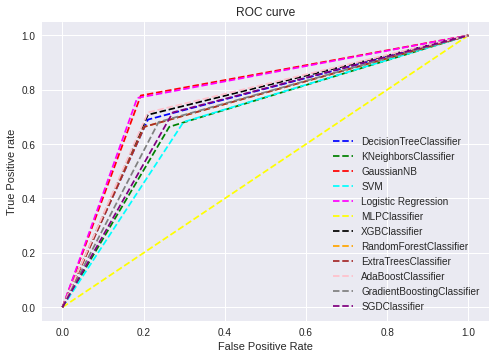

In [59]:
# matplotlib
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpositive_rate_curve[0], tpositive_rate_curve[0], linestyle='--',color='blue', label='DecisionTreeClassifier')
plt.plot(fpositive_rate_curve[1], tpositive_rate_curve[1], linestyle='--',color='green', label='KNeighborsClassifier')
plt.plot(fpositive_rate_curve[2], tpositive_rate_curve[2], linestyle='--',color='red', label='GaussianNB')
plt.plot(fpositive_rate_curve[3], tpositive_rate_curve[3], linestyle='--',color='cyan', label='SVM')
plt.plot(fpositive_rate_curve[4], tpositive_rate_curve[4], linestyle='--',color='magenta', label='Logistic Regression')
plt.plot(fpositive_rate_curve[5], tpositive_rate_curve[5], linestyle='--',color='yellow', label='MLPClassifier')
plt.plot(fpositive_rate_curve[6], tpositive_rate_curve[6], linestyle='--',color='black', label='XGBClassifier')
plt.plot(fpositive_rate_curve[7], tpositive_rate_curve[7], linestyle='--',color='orange', label='RandomForestClassifier')
plt.plot(fpositive_rate_curve[8], tpositive_rate_curve[8], linestyle='--',color='brown', label='ExtraTreesClassifier')
plt.plot(fpositive_rate_curve[9], tpositive_rate_curve[9], linestyle='--',color='pink', label='AdaBoostClassifier')
plt.plot(fpositive_rate_curve[10], tpositive_rate_curve[10], linestyle='--',color='gray', label='GradientBoostingClassifier')
plt.plot(fpositive_rate_curve[11], tpositive_rate_curve[11], linestyle='--',color='purple', label='SGDClassifier')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();